# Given a tiff file like those returned by ASF, convert to a PNG that a user can analyze and download 

**⭐The code here relies on the user to download the ZIP file provided by the ASF results in the previous step.**
**Inside the zip file is a folder named "measurement". Within this folder, be sure to input the file name that contains "VV" instead of the one that contains "VH"**

In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

## example used here is the tiff you can download from the example folder and the spill ID from the ZIP it was downloaded from  
vv_tiff_path = "s1a-iw-grd-vv-20240116t023821-20240116t023846-052126-064ceb-001.tiff"
spill_id = "73867"

# Open the TIFF
with rasterio.open(vv_tiff_path) as src:
    vv_band = src.read(1)

**These images could be extremely large. You should check what size it is to see if you need to downsize before saving and displaying**

In [2]:
height, width = vv_band.shape
print(f"🖼️ Image dimensions: {height} pixels tall × {width} pixels wide")

🖼️ Image dimensions: 16655 pixels tall × 25777 pixels wide


| Image Size       | Description    | Recommendation                                    |
| ---------------- | -------------- | ------------------------------------------------- |
| < 2,000 x 2,000  | Small/Moderate | Should plot and save quickly                      |
| \~5,000 x 5,000  | Large          | May cause delays on save/plot                     |
| 10,000 x 10,000+ | Very large     | **High memory + CPU use** – downsample unless you have lots of compute available |


**If you need want to reduce compute or produce a faster result, you can insert the following line to 4x downsample**

**This will reduce image resolution by taking every 4th pixel in both dimensions (rows and columns), making the image quicker to process and plot but with less detail**

In [3]:
downsampled_image = vv_band[::4, ::4]  # Simple 4x downsample

**Next we run contrast stretch based on percentiles**

**Stretching contrast between the 2nd and 98th percentile improves visibility of most features and removes extreme**

**This makes dark areas darker and bright areas brighter, by clipping the noisiest 2% at both ends**

In [4]:
    vmin, vmax = np.percentile(vv_band, [2, 98])

**Finally, we plot the image, save it and display it** 

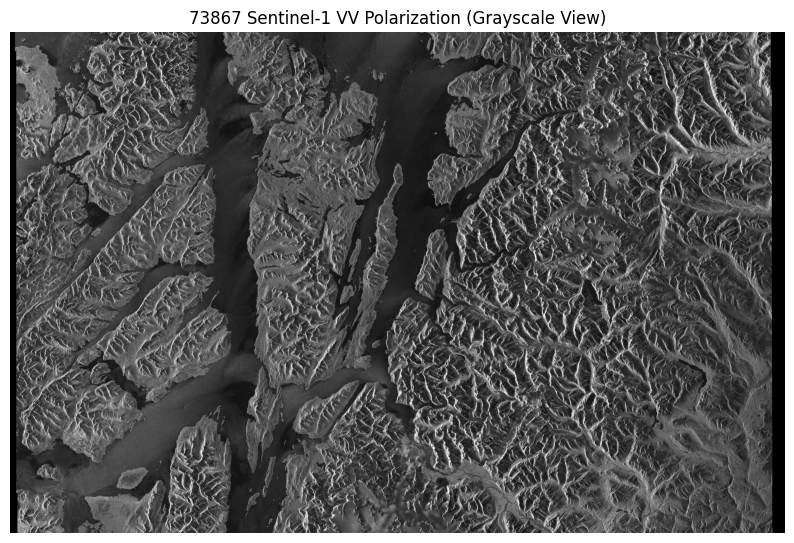

In [5]:
    #Plot and save before calling plt.show()

    plt.figure(figsize=(10, 10))
    plt.imshow(downsampled_image, cmap='gray', vmin=vmin, vmax=vmax)
    plt.title(f"{spill_id} Sentinel-1 VV Polarization (Grayscale View)")
    plt.axis('off')
    plt.savefig(f"{spill_id}.png", bbox_inches='tight')  # Save BEFORE plt.show()
    plt.show()
